###Importing and visualising the Reuters data

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from keras.datasets import reuters
number_words = 10000
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=number_words)

In [5]:
# Number of articles
print(len(train_labels), len(test_labels))

# First article
print(train_data[0])

# First label
print(train_labels[0]) # integer between 0 and 45

# Max word of the first article
print(max(train_data[0]))

# Max word overall
print(max([max(article) for article in train_data]))

8982 2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
4579
9999


In [6]:
# Decoding back to English:
def decode_review(review):
    # dictionary whose keys are the words and values are the word indices
    word_to_index = reuters.get_word_index()
    index_to_word = {}
    for word in word_to_index.keys():
        index_to_word[word_to_index[word]] = word
    review_decoded = ""
    for coded_word in review:
        if coded_word > 3:
          review_decoded += (index_to_word[coded_word-3] + " ")
        else:
          review_decoded += ("?" + " ")
    return review_decoded

In [10]:
print(decode_review(train_data[0]))
print(train_labels[0])

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3 
3


###Pre-proccesing the data

In [35]:
# Pre-processing the data into a binary matrix
def to_binary_vector(dataset, n = number_words):
    binary_matrix = np.zeros((len(dataset), n))
    for i, review in enumerate(dataset):
        for word in review:
            binary_matrix[i, word] = 1.0
    return binary_matrix

def vectorize_labels(labels, n=46):
    labels_matrix = np.zeros((len(labels), n))
    for i, label in enumerate(labels):
        labels_matrix[i, label] = 1.0
    return labels_matrix 


In [36]:
x_train = to_binary_vector(train_data)
x_test = to_binary_vector(test_data)
print(x_train[0])
y_train = vectorize_labels(train_labels)
y_test = vectorize_labels(test_labels)

[0. 1. 1. ... 0. 0. 0.]


###Building the neural network using Keras

In [42]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(46, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

###Creating a validation subset and training the network 

In [40]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [43]:
history = network.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 69ms/step - loss: 2.7464 - accuracy: 0.4957 - val_loss: 1.8639 - val_accuracy: 0.6310
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 1.5195 - accuracy: 0.6979 - val_loss: 1.3576 - val_accuracy: 0.6920
Epoch 3/20
16/16 [==============================] - 1s 52ms/step - loss: 1.0985 - accuracy: 0.7737 - val_loss: 1.1591 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 1s 50ms/step - loss: 0.8562 - accuracy: 0.8235 - val_loss: 1.0441 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6802 - accuracy: 0.8598 - val_loss: 0.9821 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5483 - accuracy: 0.8887 - val_loss: 0.9398 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.4411 - accuracy: 0.9118 - val_loss: 0.8980 - val_accuracy: 0.8120
Epoch 8/20
16

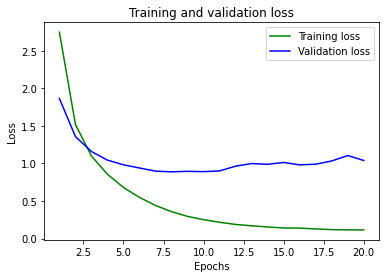

In [44]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

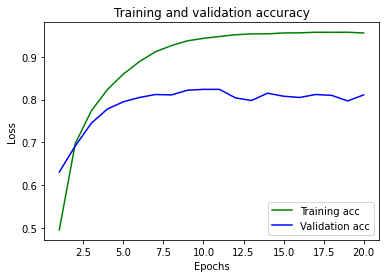

In [45]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'g', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We observe the loss starting to increase and the accuracy to slightly decrease for the validation set after *epoch 9*. So let's retrain a similar network, this time for just 9 epochs.

In [46]:
network = models.Sequential()
network.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(46, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

network.fit(x_train, y_train, epochs = 9, batch_size = 512)

Epoch 1/9
18/18 [==============================] - 2s 60ms/step - loss: 2.5936 - accuracy: 0.5350
Epoch 2/9
18/18 [==============================] - 1s 56ms/step - loss: 1.3632 - accuracy: 0.7167
Epoch 3/9
18/18 [==============================] - 1s 58ms/step - loss: 1.0061 - accuracy: 0.7870
Epoch 4/9
18/18 [==============================] - 1s 48ms/step - loss: 0.7782 - accuracy: 0.8392
Epoch 5/9
18/18 [==============================] - 1s 47ms/step - loss: 0.6143 - accuracy: 0.8754
Epoch 6/9
18/18 [==============================] - 1s 72ms/step - loss: 0.4869 - accuracy: 0.9005
Epoch 7/9
18/18 [==============================] - 2s 103ms/step - loss: 0.3912 - accuracy: 0.9197
Epoch 8/9
18/18 [==============================] - 2s 96ms/step - loss: 0.3204 - accuracy: 0.9315
Epoch 9/9
18/18 [==============================] - 2s 103ms/step - loss: 0.2661 - accuracy: 0.9385


In [54]:
results = network.evaluate(x_test, y_test)
print(results)
print([np.argmax(article_prediction) for article_prediction in network.predict(x_test)])

71/71 [==============================] - 0s 6ms/step - loss: 0.9965 - accuracy: 0.7890
[0.9965115785598755, 0.7889581322669983]
[3, 10, 1, 16, 13, 3, 3, 3, 3, 3, 1, 4, 1, 3, 1, 11, 3, 3, 19, 3, 8, 3, 3, 3, 9, 3, 4, 6, 10, 3, 3, 10, 16, 3, 19, 4, 19, 1, 4, 3, 3, 21, 3, 12, 4, 4, 3, 4, 3, 11, 20, 3, 3, 3, 3, 19, 16, 4, 20, 19, 4, 3, 4, 4, 4, 3, 3, 1, 3, 4, 19, 16, 3, 19, 43, 24, 1, 3, 32, 4, 3, 3, 3, 11, 19, 20, 1, 19, 16, 3, 3, 4, 3, 19, 3, 11, 11, 3, 4, 1, 41, 3, 20, 3, 3, 3, 4, 13, 4, 3, 19, 3, 4, 3, 18, 3, 4, 4, 3, 4, 3, 3, 19, 4, 18, 3, 19, 3, 4, 3, 8, 3, 1, 3, 3, 4, 13, 1, 3, 3, 3, 3, 4, 4, 19, 1, 4, 6, 3, 3, 4, 4, 3, 3, 4, 1, 3, 3, 11, 17, 3, 3, 2, 4, 3, 4, 3, 10, 3, 3, 3, 20, 3, 12, 3, 21, 4, 16, 3, 3, 3, 8, 3, 20, 3, 21, 3, 3, 6, 35, 18, 3, 11, 36, 8, 19, 3, 4, 20, 4, 16, 16, 19, 3, 3, 4, 4, 19, 2, 4, 3, 4, 3, 3, 3, 20, 4, 20, 3, 3, 3, 3, 3, 4, 13, 3, 13, 13, 25, 3, 4, 19, 3, 11, 9, 1, 3, 3, 11, 16, 19, 1, 4, 4, 11, 3, 3, 4, 19, 3, 4, 4, 3, 3, 25, 4, 31, 4, 26, 11, 19, 4, 4, 4, 

The first number in the results is the loss function (the categorical crossentropy). The next numbers are the metrics, in our case it's just the accuracy. 

We therefore got an accuracy of 79%